In [1]:
import pandas as pd
import altair as alt

alt.themes.enable('opaque')

ThemeRegistry.enable('opaque')

In [11]:
state = pd.read_csv('data/state-tax-trend.csv')
counties = pd.read_csv('data/taxes-by-county.csv')
# Add in lat/long data
cities = pd.read_csv('data/taxes-by-city.csv')
city_points = pd.read_csv('raw/mt-incorporated-cities.csv')
cities = cities.merge(city_points[['city','class','longitude','latitude']], left_on='City', right_on='city').drop('city', axis=1)

In [53]:
state.head()

,year,population,residential_tax_collections,total_tax_collections,total_per_capita,res_per_capita,rel_cpi,total_inflationary_increase
0,2002,911667,3.600676e+08,8.035759e+08,881.435810,394.955173,1.00,881.435810
1,2003,919630,3.845288e+08,8.460347e+08,919.972924,418.134299,1.02,899.064526
2,2004,930009,4.204788e+08,9.053522e+08,973.487536,452.123401,1.05,925.507600
3,2005,940102,4.508389e+08,9.683214e+08,1030.017399,479.563849,1.08,951.950675
4,2006,952692,4.766749e+08,1.019494e+09,1070.118876,500.345182,1.13,996.022465


In [4]:
cities.head()

,County #,County,City Code,City,year,total_taxes,residential_taxes,total_taxes_per_capita,residential_taxes_per_capita,res_percent,non_res_taxes,non_res_taxes_per_capita,class,longitude,latitude
0,54.0,Mineral,ALB-54,Alberton,2002,169691.80788,102830.42980,457.390318,277.170970,0.605983,66861.37808,180.219348,TN,-114.481673,47.00394
1,54.0,Mineral,ALB-54,Alberton,2003,189834.11928,113499.47769,496.947956,297.119052,0.597888,76334.64159,199.828905,TN,-114.481673,47.00394
2,54.0,Mineral,ALB-54,Alberton,2004,232099.20300,133029.63240,596.656049,341.978489,0.573159,99069.57060,254.677559,TN,-114.481673,47.00394
3,54.0,Mineral,ALB-54,Alberton,2005,260922.12510,151541.15249,644.252161,374.175685,0.580791,109380.97261,270.076476,TN,-114.481673,47.00394
4,54.0,Mineral,ALB-54,Alberton,2006,278240.98669,164174.46569,672.079678,396.556680,0.590044,114066.52100,275.522998,TN,-114.481673,47.00394


In [5]:
counties.head()

,County #,County,year,total_taxes,residential_taxes,total_taxes_per_capita,residential_taxes_per_capita,res_per_income,fips,region,res_percent,non_res_taxes,non_res_taxes_per_capita
0,18,Beaverhead,2002,7.991143e+06,3.512553e+06,886.132476,389.504703,0.017072,30001,Mountains,0.439556,4.478589e+06,496.627774
1,18,Beaverhead,2003,7.937825e+06,3.547598e+06,889.491834,397.534541,0.016347,30001,Mountains,0.446923,4.390227e+06,491.957293
2,18,Beaverhead,2004,8.405847e+06,3.779371e+06,943.628935,424.267076,0.016468,30001,Mountains,0.449612,4.626475e+06,519.361858
3,18,Beaverhead,2005,8.631169e+06,3.824307e+06,969.358630,429.504347,0.015878,30001,Mountains,0.443081,4.806863e+06,539.854283
4,18,Beaverhead,2006,8.974881e+06,4.029238e+06,995.881139,447.096995,0.016658,30001,Mountains,0.448946,4.945643e+06,548.784144


In [116]:
counties[(counties['County'] == 'Lake') & (counties['year'] == 2018)]

,County #,County,year,total_taxes,residential_taxes,total_taxes_per_capita,residential_taxes_per_capita,res_per_income,fips,region,res_percent,non_res_taxes,non_res_taxes_per_capita
407,15,Lake,2018,3.817964e+07,3.089499e+07,1262.136911,1021.322005,0.025945,30047,Mountains,0.809201,7.284651e+06,240.814906


In [5]:
c18 = counties[counties['year'] == 2018]
c18.sort_values('residential_taxes_per_capita').head(5)

,County #,County,year,total_taxes,residential_taxes,per_capita_taxes,residential_taxes_per_capita,res_per_income,fips,region,res_percent
492,41,McCone,2018,4.971165e+06,1.101354e+06,566.966787,125.610625,0.015578,30055,Plains,0.221548
747,29,Rosebud,2018,2.901138e+07,1.622164e+06,3201.079073,178.987488,0.004236,30087,Plains,0.055915
33,22,Big Horn,2018,1.401067e+07,2.505368e+06,1050.432874,187.836846,0.006152,30003,Plains,0.178819
730,17,Roosevelt,2018,1.968846e+07,2.242729e+06,1780.310638,202.796759,0.005829,30085,Plains,0.113911
305,38,Glacier,2018,1.799791e+07,2.928791e+06,1309.224430,213.049483,0.006183,30035,Plains,0.162730


In [6]:
c18.sort_values('residential_taxes_per_capita').tail(5)

,County #,County,year,total_taxes,residential_taxes,per_capita_taxes,residential_taxes_per_capita,res_per_income,fips,region,res_percent
339,46,Granite,2018,7.313484e+06,3.428419e+06,2165.033858,1014.925632,0.023176,30039,Mountains,0.468780
407,15,Lake,2018,3.817964e+07,3.089499e+07,1262.136911,1021.322005,0.025945,30047,Mountains,0.809201
271,6,Gallatin,2018,1.869871e+08,1.223758e+08,1671.377990,1093.851700,0.019985,30031,Bozeman,0.654461
254,7,Flathead,2018,1.668969e+08,1.172174e+08,1634.545148,1147.997595,0.024255,30029,Kalispell,0.702335
475,25,Madison,2018,3.456741e+07,2.645570e+07,20637.259301,15794.447444,0.061433,30057,Mountains,0.765336


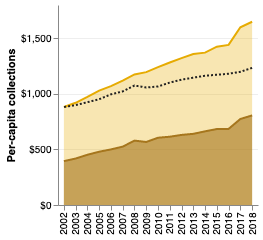

In [49]:
xEncoding = alt.X('year:O', title='')
yAxis = alt.Axis(format='$,.0f', gridDash=[1,1])

res = alt.Chart(state).mark_area(
    color='#a6761d',
    opacity=0.6,
).encode(
    x=xEncoding,
    y=alt.Y(
        'res_per_capita',
        title='Per-capita collections',
        axis=yAxis,
#         scale=alt.Scale(domain=[0,6000])
    )
)

res_line = alt.Chart(state).mark_line(
    color='#a6761d',
).encode(
    x=xEncoding,
    y=alt.Y(
        'res_per_capita',
        axis=yAxis,
    )
)

total = alt.Chart(state).mark_area(
    color='#e6ab02',
    opacity=0.3
).encode(
    x=xEncoding,
    y=alt.Y(
        'total_per_capita',
#         title='Taxes paid by residential property owners, per-capita',
        axis=yAxis,
#         scale=alt.Scale(domain=[0,6000])
    )
)

total_line = alt.Chart(state).mark_line(
    color='#e6ab02',
).encode(
    x=xEncoding,
    y=alt.Y(
        'total_per_capita',
        axis=yAxis,
    )
)

inflation_comp = alt.Chart(state).mark_line(
    color='#222',
    strokeDash=[2,2],
).encode(
    x=xEncoding,
    y=alt.Y(
        'total_inflationary_increase',
        axis=yAxis,
    )
)

# TODO - add rate of inflation line
# TODO - add rate of income growth line

(total + res + res_line + total_line + inflation_comp).properties(
#     title='Montana property tax collections, per-capita'
).properties(
    width=200,
    height=200,
).configure_view(
    strokeOpacity=0,
)

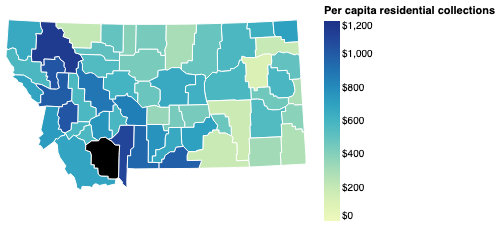

In [89]:
# Adapted from: https://altair-viz.github.io/gallery/choropleth.html
mt_counties_topojson_url = 'https://gist.githubusercontent.com/eidietrich/30118ba41ea41681948b06b0cf75864f/raw/9f8a2ed6d61d8ad7c42207ab4ef55a1e6548a909/mt-10m-counties.json'
county_lines = alt.topo_feature(mt_counties_topojson_url, 'counties')

# filter data
year = 2018
data = counties[counties['year'] == year]
# data = data[data['County'] != 'Madison']

background = alt.Chart(county_lines).mark_geoshape(
    fill='lightgray',
    stroke='white'
).encode(
    color=alt.Color('residential_taxes_per_capita:Q',
                    scale=alt.Scale(
                        domain=[0,1200],
                        scheme='yellowgreenblue', 
                    ),
#                     sort='descending',
                    title='Per capita residential collections'),
    tooltip=['residential_taxes_per_capita:Q', 'res_percent:Q']
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(data, 'fips', ['residential_taxes_per_capita', 'res_percent'])
).project(
    type='albers',
    rotate=[110,0]
).properties(
    width=300,
    height=200,
#     title=f'Property tax burden on residential taxpayers by county, {year}'
)
# 
(background).configure(numberFormat='$,.0f').configure_view(strokeOpacity=0)

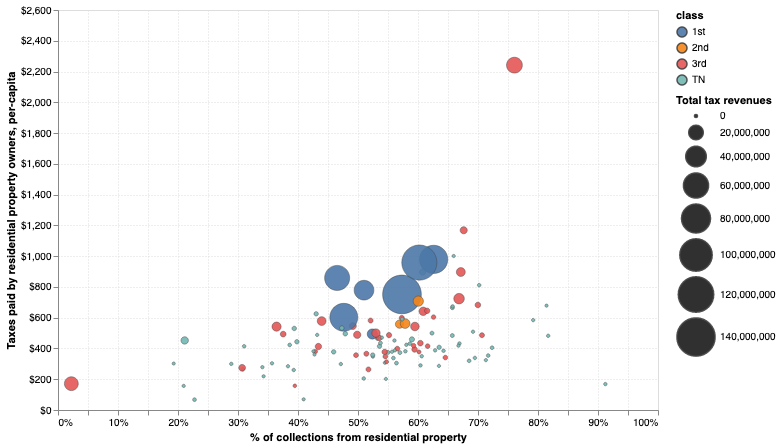

In [90]:
s = alt.Scale()
s = alt.Scale(domain=[0,2500])
# s = alt.Scale(domain=[0,8000])
yEncoding = alt.Y(
    'residential_taxes_per_capita',
    scale=s,
    axis=alt.Axis(format='$,.0f', gridDash=[1,2]),
    title='Taxes paid by residential property owners, per-capita'
)
xEncoding = alt.X('res_percent',
    axis=alt.Axis(format='%', gridDash=[1,2]),
    title='% of collections from residential property'
)
xEncoding2 = alt.Y(
    'total_taxes_per_capita',
    scale=alt.Scale(domain=[0,8000]),
    axis=alt.Axis(format='$,.0f', gridDash=[1,2]),
    title='Taxes paid by residential property owners, per-capita'
)


alt.Chart(cities[cities['year'] == 2018]).mark_circle(
    opacity=0.9,
#     fill='blue',
    stroke='#444',
    strokeWidth=0.5,
    clip=True,
).encode(
    y=yEncoding,
    x=xEncoding,
    size=alt.Size(
        'total_taxes',
        title='Total tax revenues',
        scale=alt.Scale(range=[10,1500])
    ),
    color=alt.Color('class'),
    detail='City',
    tooltip=['City','total_taxes', 'residential_taxes_per_capita','total_taxes_per_capita'],
).properties(
    width=600,
    height=400,
#     title='Property tax burdens within Montana municipalities, 2018',  
)

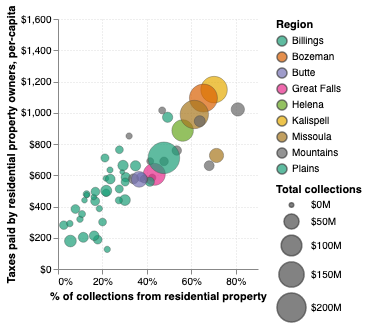

In [110]:
colors = ['']

s = alt.Scale(domain=[0,1500])
yEncoding = alt.Y(
    'residential_taxes_per_capita',
    axis=alt.Axis(format='$,.0f', gridDash=[1,2]),
    scale=s,
    title='Taxes paid by residential property owners, per-capita',
)
xEncoding = alt.X('res_percent',
    axis=alt.Axis(format='%', gridDash=[1,2]),
    title='% of collections from residential property'
)

alt.Chart(counties[counties['year'] == 2018]).mark_circle(
    opacity=0.7,
    fill='blue',
    stroke='#444',
    strokeWidth=0.5,
    clip=True,
).encode(
    y=yEncoding,
    x=xEncoding,
    size=alt.Size('total_taxes', scale=alt.Scale(range=[20,1000]), legend=alt.Axis(format='$,.0s', title='Total collections')),
    color=alt.Color('region', scale=alt.Scale(scheme='dark2'), title='Region'),
    detail='County',
    tooltip=['County','total_taxes', 'residential_taxes_per_capita'],
).properties(
    width=200,
    height=250,
#     title='Property tax burdens by Montana counties, 2018 (Madison County well off chart)', 
).configure_view(strokeOpacity=0)

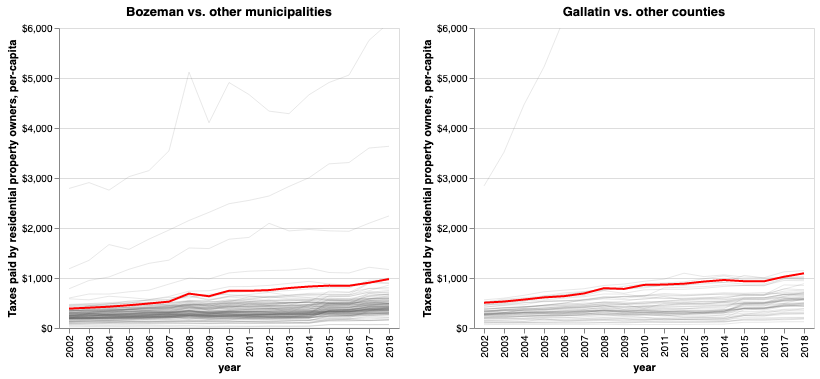

In [156]:
# Set this up as a find-your-town interactive
# TODO: Adjust for inflation
# Add Montana overall

yEncoding = alt.Y(
    'residential_taxes_per_capita',
    title='Taxes paid by residential property owners, per-capita',
    axis=alt.Axis(format='$,.0f'),
    scale=alt.Scale(domain=[0,6000])
)

city = 'Bozeman'
county = 'Gallatin'

city_plot = alt.Chart(cities).mark_line(
    opacity=0.3,
    color="#666",
    strokeWidth=0.5,
    clip=True
).encode(
    x='year:O',
    y=yEncoding,
    detail='City',
    tooltip=['City'],
)

county_plot = alt.Chart(counties).mark_line(
     opacity=0.3,
    color="#666",
    strokeWidth=0.5,
    clip=True

).encode(
    x='year:O',
    y=yEncoding,
    detail='County',
    tooltip=['County'],
)

city_highlight = alt.Chart(cities[cities['City'] == city]).mark_line(
    color='red',
    clip=True
).encode(
    x='year:O',
    y=yEncoding,
)

county_highlight = alt.Chart(counties[counties['County'] == county]).mark_line(
    color='red',
    clip=True
).encode(
    x='year:O',
    y=yEncoding
)


(city_plot + city_highlight).properties(title=f'{city} vs. other municipalities') | (county_plot + county_highlight).properties(title=f'{county} vs. other counties')

In [42]:
# s = alt.Scale()
# s = alt.Scale(domain=[0,2500])
# # s = alt.Scale(domain=[0,8000])
# yEncoding = alt.Y(
#     'residential_taxes_per_capita',
#     scale=s,
#     axis=alt.Axis(format='$,.0f', gridDash=[1,2]),
#     title='Taxes paid by residential property owners, per-capita'
# )
# xEncoding = alt.X('res_percent',
#     axis=alt.Axis(format='%', gridDash=[1,2]),
#     title='% of collections from residential property'
# )
# yEncoding2 = alt.Y(
#     'total_taxes_per_capita',
#     scale=alt.Scale(domain=[0,8000]),
#     axis=alt.Axis(format='$,.0f', gridDash=[1,2]),
#     title='Taxes paid by residential property owners, per-capita'
# )


# c1 = alt.Chart(cities[cities['year'] == 2018]).mark_circle(
#     opacity=0.9,
# #     fill='blue',
#     stroke='#444',
#     strokeWidth=0.5,
#     clip=True,
# ).encode(
#     x=yEncoding,
#     y='City',
# #     size=alt.Size(
# #         'total_taxes',
# #         title='Total tax revenues',
# #         scale=alt.Scale(range=[10,1500])
# #     ),
#     color=alt.Color('class'),
#     detail='City',
#     tooltip=['City','total_taxes', 'residential_taxes_per_capita','total_taxes_per_capita'],
# )

# c2 = alt.Chart(cities[cities['year'] == 2018]).mark_circle(
#     opacity=0.9,
# #     fill='blue',
#     stroke='#444',
#     strokeWidth=0.5,
#     clip=True,
# ).encode(
#     x=yEncoding2,
#     y='City',
# #     size=alt.Size(
# #         'total_taxes',
# #         title='Total tax revenues',
# #         scale=alt.Scale(range=[10,1500])
# #     ),
#     color=alt.Color('class'),
#     detail='City',
#     tooltip=['City','total_taxes', 'residential_taxes_per_capita','total_taxes_per_capita'],
# )

# lines = alt.Chart(cities[cities['year'] == 2018]).mark_line().encode(
#     y='City',
#     x='zero:Q',
#     x2='total_taxes_per_capita',
# ).transform_calculate(zero='0',)

# (lines + c1 + c2).properties(
#     width=600,
#     height=400,
#     title='Property tax burdens within Montana municipalities, 2018',  
# )

In [43]:
cities.head()

,County #,County,City Code,City,year,total_taxes,residential_taxes,total_taxes_per_capita,residential_taxes_per_capita,res_percent,non_res_taxes,non_res_taxes_per_capita,class,longitude,latitude
0,54.0,Mineral,ALB-54,Alberton,2002,169691.80788,102830.42980,457.390318,277.170970,0.605983,66861.37808,180.219348,TN,-114.481673,47.00394
1,54.0,Mineral,ALB-54,Alberton,2003,189834.11928,113499.47769,496.947956,297.119052,0.597888,76334.64159,199.828905,TN,-114.481673,47.00394
2,54.0,Mineral,ALB-54,Alberton,2004,232099.20300,133029.63240,596.656049,341.978489,0.573159,99069.57060,254.677559,TN,-114.481673,47.00394
3,54.0,Mineral,ALB-54,Alberton,2005,260922.12510,151541.15249,644.252161,374.175685,0.580791,109380.97261,270.076476,TN,-114.481673,47.00394
4,54.0,Mineral,ALB-54,Alberton,2006,278240.98669,164174.46569,672.079678,396.556680,0.590044,114066.52100,275.522998,TN,-114.481673,47.00394


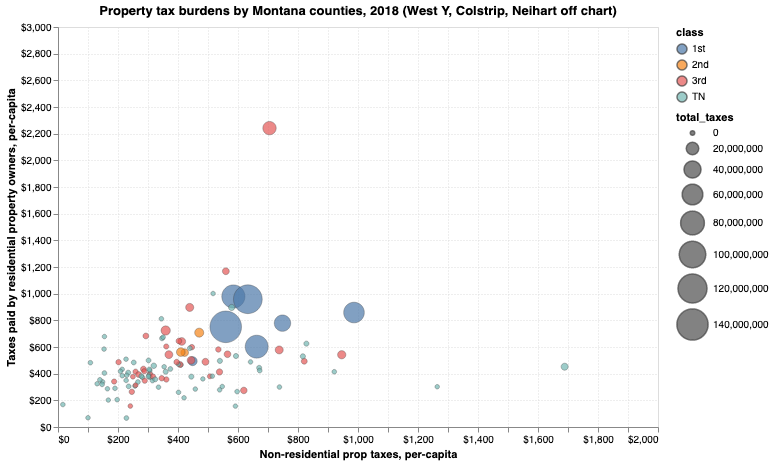

In [54]:
yEncoding = alt.Y(
    'residential_taxes_per_capita',
    axis=alt.Axis(format='$,.0f', gridDash=[1,2]),
    scale=alt.Scale(domain=[0,3000]),
    title='Taxes paid by residential property owners, per-capita',
)
xEncoding = alt.X(
    'non_res_taxes_per_capita',
    axis=alt.Axis(format='$,.0f', gridDash=[1,2]),
    scale=alt.Scale(domain=[0,2000]),
    title='Non-residential prop taxes, per-capita'
)

alt.Chart(cities[cities['year'] == 2018]).mark_circle(
    opacity=0.7,
#     fill='blue',
    stroke='#444',
    strokeWidth=0.5,
    clip=True,
).encode(
    y=yEncoding,
    x=xEncoding,
    size=alt.Size('total_taxes', scale=alt.Scale(range=[20,1000])),
    color='class',
    detail='City',
    tooltip=['City','total_taxes', 'residential_taxes_per_capita'],
).properties(
    width=600,
    height=400,
    title='Property tax burdens by Montana counties, 2018 (West Y, Colstrip, Neihart off chart)',  
)

In [150]:
# Html table
inc_cols = {
    'County': 'County',
    'total_taxes': '2018 property tax collections',
    'residential_taxes_per_capita': 'Residential, per capita',
    'non_res_taxes_per_capita': 'Non-residential, per capita',
    'res_percent': '% residential'
}

table = counties[counties['year'] == 2018][inc_cols.keys()]
table = table.sort_values('total_taxes', ascending=False)
table['total_taxes'] = table['total_taxes'].map('${:,.0f}'.format)
table['residential_taxes_per_capita'] = table['residential_taxes_per_capita'].map('${:,.0f}'.format)
table['non_res_taxes_per_capita'] = table['non_res_taxes_per_capita'].map('${:,.0f}'.format)
table['res_percent'] = table['res_percent'].map('{:.0%}'.format)
table.rename(columns=inc_cols, inplace=True)
table.to_html(index=False)

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th>County</th>\n      <th>2018 property tax collections</th>\n      <th>Residential, per capita</th>\n      <th>Non-residential, per capita</th>\n      <th>% residential</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <td>Yellowstone</td>\n      <td>$239,058,456</td>\n      <td>$711</td>\n      <td>$781</td>\n      <td>48%</td>\n    </tr>\n    <tr>\n      <td>Missoula</td>\n      <td>$191,468,609</td>\n      <td>$989</td>\n      <td>$623</td>\n      <td>61%</td>\n    </tr>\n    <tr>\n      <td>Gallatin</td>\n      <td>$186,987,084</td>\n      <td>$1,094</td>\n      <td>$578</td>\n      <td>65%</td>\n    </tr>\n    <tr>\n      <td>Flathead</td>\n      <td>$166,896,867</td>\n      <td>$1,148</td>\n      <td>$487</td>\n      <td>70%</td>\n    </tr>\n    <tr>\n      <td>Cascade</td>\n      <td>$114,210,272</td>\n      <td>$606</td>\n      <td>$793</td>\n      <td>43%</td>\n    </tr>\n    <

,County,total_taxes,residential_taxes_per_capita,non_res_taxes_per_capita,res_percent
16,Beaverhead,1.357459e+07,688.745913,754.745522,0.477139
33,Big Horn,1.401067e+07,187.836846,862.596027,0.178819
50,Blaine,1.020177e+07,300.430428,1198.286335,0.200458
67,Broadwater,8.384698e+06,584.210534,793.718448,0.423977
84,Carbon,2.109131e+07,971.220958,997.353816,0.493362
101,Carter,1.332037e+07,280.569598,10479.021960,0.026076
118,Cascade,1.142103e+08,606.014448,792.884072,0.433208
135,Chouteau,1.491394e+07,434.198692,2161.786571,0.167258
152,Custer,1.565606e+07,558.255971,793.035064,0.413128
169,Daniels,4.731509e+06,633.638301,2074.724114,0.233956
